In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Завдання 1
### Маємо вибірку 
$$\overline{X} = (X_{1}, \ldots , X_{n}), де \{ X_{i} \}$$
### незалежні однаково розподілені випадкові величини

### Рівень значимості маємо
$$\gamma = 0.05$$
$$z_{\gamma} = 1.36$$


In [2]:
gamma = 0.05
z_gamma = 1.36

## Завдання 1.

### 1. обираємо рівень значимості $$\gamma$$ та за таблицею для розподілу Колмогорова знаходимо $z_{\gamma}$ таке, що $K(z_{\gamma}) = 1 - \gamma$.


### Маємо, що
$$\gamma = 0.05$$
$$z_{\gamma} = 1.36$$


### 2. За формулою 
$$D_n(\bar x) = \max_{1 \le k \le n}{\{ \max{ \{ (F(x_{(k)})-\frac{k-1}{n}),(\frac{k}{n}-(F(x_{(k)}))\}}\}}$$ 
обчислюємо $D_n(\bar x)$.


### 3. Якщо 
$$ \sqrt{n}D_n(\bar x)<z_{\gamma}, $$
то робимо висновок: статистичні дані не суперечать гіпотезі $H_0$. Якщо ж $\bar x \in Z_1$, то слід прийняти альтернативну гіпотезу $H_1$.


In [23]:
LAMBDA1 = 1
LAMBDA2 = 1.3

F_function_empirical = lambda u, X: np.count_nonzero(u >= X) / len(X) #функція розподілу. емпірична
F_function_theoretical = lambda u, LAMBDA: 1 - np.math.exp((-1) * LAMBDA * u) #функція розподілу. теоретична

In [55]:
def Dn_max(Xk, LAMBDA):
    n = len(Xk)
    Dn_m_p = np.max( [k / n - F_function_theoretical(x, LAMBDA) for k,x in enumerate(Xk)] )
    Dn_m_n = np.max( [F_function_theoretical(x, LAMBDA) - (k-1)/n  for k,x in enumerate(Xk)] )
    return [Dn_m_n, Dn_m_p]

### Для $\lambda =1$

In [66]:
N = [pow(10,3), pow(10,4), pow(10,5)]
X1_1000 = np.sort(np.random.exponential(LAMBDA1, size = N[0]))
X1_10000 = np.sort(np.random.exponential(LAMBDA1, size = N[1]))
X1_100000 = np.sort(np.random.exponential(LAMBDA1, size = N[2]))


D1 = [np.sqrt(N[0]) * max(Dn_max(X1_1000, LAMBDA1)), np.sqrt(N[1]) * max(Dn_max(X1_10000, LAMBDA1)), np.sqrt(N[2]) * max(Dn_max(X1_100000, LAMBDA1))]

RES_FOR_LAMBDA1 = ['H0' if element < z_gamma else 'false' for element in D1]



### Для $\lambda = 1.3$

In [67]:
X2_1000 = np.sort(np.random.exponential(LAMBDA2, size = N[0]))
X2_10000 = np.sort(np.random.exponential(LAMBDA2, size = N[1]))
X2_100000 = np.sort(np.random.exponential(LAMBDA2, size = N[2]))


D2 = [np.sqrt(N[0]) * max(Dn_max(X2_1000, LAMBDA2)), np.sqrt(N[1]) * max(Dn_max(X2_10000, LAMBDA2)), np.sqrt(N[2]) * max(Dn_max(X2_100000, LAMBDA2))]

RES_FOR_LAMBDA2 = ['H0' if element < z_gamma else 'false' for element in D2]


In [68]:
data_1 = {"Завдання 1":["","",""],"D":D1,"Результат для lambda = 1":RES_FOR_LAMBDA1,"D2":D2,"Результат для lambda = 1": RES_FOR_LAMBDA2}
df1 = pd.DataFrame.from_dict(data_1, orient='index', columns=N)


In [29]:
df1

,1000,10000,100000
Завдання 1,,,
D,0.531071,0.561778,1.333411
RES_1,H0,H0,H0
D2,2.294939,6.884982,21.895691
RES_1_2,False,False,False


## Завдання 2
за допомогою критерія $\chi^2$ перевірити гіпотези
Зауваження. Кількість проміжків  обирати з умови: $$r=\frac{30 \times n}{1000}$$


### $\chi^2$ - міра
$$\delta^{(x)}_r=\sum^{r}_{i=1} \frac{(v_i-np_i)^2}{n p_i}$$

In [10]:
# p = 1 - 0.05 = 0.95
xi_average = 1.645

xi_30 = 43.8

r = lambda n : int(30*n/1000)
xi_big = lambda n : (xi_average + np.math.sqrt(2*n -1))**2/2

xi_big(r(1000))

43.488497255243864

In [11]:
import math

def xi_sqr(data):
    
    n =  len(data)
    R = r(n)
    tmp = R / 30 
    p = [F_zero(i / tmp, LAMBDA) - F_zero((i - 1) / tmp, LAMBDA) for i in range(1, R + 1)] 
    v = np.zeros(R)  
    for i in range(n):
        v[math.ceil(np.random.choice(data, 1) * tmp) - 1] += 1  

    
    delta = np.sum([((v[i] - n * p[i]) ** 2) / (n * p[i]) for i in range(R)])
    return delta 

res = xi_sqr(np.copy(X_1000))

print(res)


8.884499786496875


In [12]:
N2 = [1000, 10000, 100000]
XI = [17.70836618, 259.9453829, 2872.758544]    #[xi_big(N[i]) for i in range(3)]
D_2_1 = [xi_sqr(X_1000), xi_sqr(X_10000), xi_sqr(X_100000)]
D_2_2 = [xi_sqr(X_2_1000), xi_sqr(X_2_10000), xi_sqr(X_2_100000)]
RES_2_1  = ["H0" if D_2_1[i] < XI[i] else "False" for i in range(3)]
RES_2_2  = ["H0" if D_2_2[i] < XI[i] else "False" for i in range(3)]


data_2 = {"Завдання 2": ["", "", ""], "XI_sqr": XI, "lambda == 1":D_2_1,"RES_2_1":RES_2_1,"lambda == 1.2":D_2_2,"RES_2_2": RES_2_2}
df2 = pd.DataFrame.from_dict(data_2, orient='index', columns=N)


In [13]:
df2

,1000,10000,100000
Завдання 2,,,
XI_sqr,17.708366,259.945383,2872.758544
lambda == 1,13.953436,273.387043,2656.401227
RES_2_1,H0,False,H0
lambda == 1.2,144.394019,726.331449,28036.210326
RES_2_2,False,False,False


Text(100000, 28036.21032591698, '28036.21')

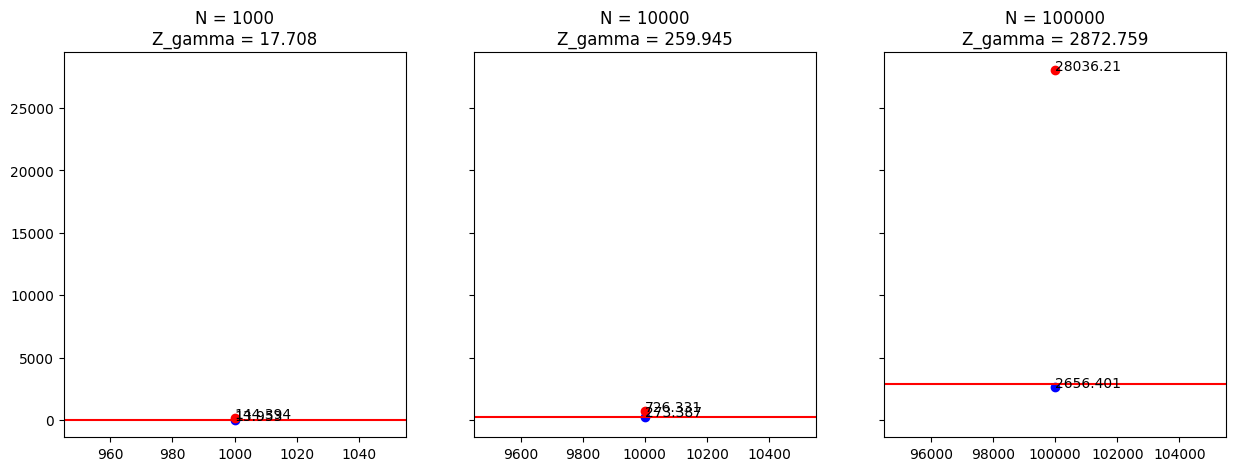

In [14]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)
ax[0].plot(N[0], D_2_1[0], 'bo', N[0], D_2_2[0], 'ro')
ax[1].plot(N[1], D_2_1[1], 'bo', N[1], D_2_2[1], 'ro')
ax[2].plot(N[2], D_2_1[2], 'bo', N[2], D_2_2[2], 'ro')

ax[0].axhline(XI[0], color='r')
ax[1].axhline(XI[1], color='r')
ax[2].axhline(XI[2], color='r')


ax[0].set(title=f'N = {N[0]}\nZ_gamma = {round(XI[0],3)}')
ax[1].set(title=f'N = {N[1]}\nZ_gamma = {round(XI[1],3)}')
ax[2].set(title=f'N = {N[2]}\nZ_gamma = {round(XI[2],3)}')

ax[0].annotate(f"{round(D_2_1[0],3)}", (N[0], D_2_1[0]))
ax[0].annotate(f"{round(D_2_2[0],3)}", (N[0], D_2_2[0]))

ax[1].annotate(f"{round(D_2_1[1],3)}", (N[1], D_2_1[1]))
ax[1].annotate(f"{round(D_2_2[1],3)}", (N[1], D_2_2[1]))

ax[2].annotate(f"{round(D_2_1[2],3)}", (N[2], D_2_1[2]))
ax[2].annotate(f"{round(D_2_2[2],3)}", (N[2], D_2_2[2]))

### Завдання 3

In [15]:
def empty_box(data, this_lambda):
    #n = len(data)
    n = data
    ro = 2    
    R = int(n / ro)  
    z_gamma = 1.644853627  
    
    v = np.zeros(R)  
    for i in range(n):        
        #x = np.random.choice(data, 1)  
        x = np.random.exponential(this_lambda, 1)
        v[math.ceil(F_zero(x, LAMBDA ) * R) - 1] += 1  
 
    mu = np.count_nonzero(v == 0)  
    e_pow_m_ro = math.exp(-ro)  
    k_gamma = R * e_pow_m_ro + z_gamma * math.sqrt(R * e_pow_m_ro * (1 - (1 + ro) * e_pow_m_ro))  
    
    return mu, k_gamma

empty_box(10000, 1)


(631, 709.6532428172949)

In [16]:
N2 = [1000, 10000, 100000]

D_1 = [empty_box(N2[i],LAMBDA) for i in range(3)]
D_2 = [empty_box(N2[i],LAMBDA_2) for i in range(3)]

D_1_res = [D_1[i][0] for i in range(3)]
D_1_crit = [D_1[i][1] for i in range(3)]

D_2_res = [D_2[i][0] for i in range(3)]
D_2_crit = [D_2[i][1] for i in range(3)]

RES_1  = ["H0" if D_1[i][0] < D_1[i][1] else "False" for i in range(3)]
RES_2  = ["H0" if D_2[i][0] < D_2[i][1] else "False" for i in range(3)]


data_3 = {"Завдання 3":["","",""],
"mu 1": D_1_res,
"k_gamma 1": D_1_crit,
"RES":RES_1,
"mu 1.2": D_2_res,
"k_gamma 1.2": D_2_crit,
"RES2": RES_2
}
df3 = pd.DataFrame.from_dict(data_3, orient='index', columns=N)

In [17]:
df3

,1000,10000,100000
Завдання 3,,,
mu 1,72,654,6732
k_gamma 1,78.09583,709.653243,6871.046044
RES,H0,H0,H0
mu 1.2,68,747,7140
k_gamma 1.2,78.09583,709.653243,6871.046044
RES2,H0,False,False


### Завдання 4

In [18]:
def get_X_2(X1, LAMBDA = LAMBDA):
    return np.sort(np.random.exponential(LAMBDA, int(len(X1)/2)))


def task_4(X1, X2):
    n = len(X1)
    m = len(X2)

    
    D_mn_plus = D_mn_min = 0

    D_mn_plus = np.max([(k+1)/m - F_hat(X2[k], X1) for k in range(m)])
    
    D_mn_min  = np.max([F_hat(X2[k], X1) - (k+1)/m  for k in range(m)])

    D_mn = max(D_mn_min, D_mn_plus)

    return  [D_mn, z_gamma * np.math.sqrt( 1/n + 1/m)]

X_500 = get_X_2(X_1000, 1)

task_4(X_1000, X_500)


[0.04999999999999999, 0.0744902678207026]

$$ H_0\ :\ \bar{ X^{(1)}} \sim F(u,1); \bar{ X^{(2)}} \sim F(u,1);\\\text{(Насправді так і є)}


In [19]:
N = [1000, 10000, 100000]

D_mn_1 = np.zeros(3)
Res_mn_1 = np.zeros(3)
Crit_mn_1 = np.zeros(3)

D_mn_1[0], Crit_mn_1[0] = task_4(X_1000, get_X_2(X_1000, LAMBDA))
D_mn_1[1], Crit_mn_1[1] = task_4(X_10000, get_X_2(X_10000, LAMBDA))
D_mn_1[2], Crit_mn_1[2] = task_4(X_100000, get_X_2(X_100000, LAMBDA))


Res_mn_1  = ["H0" if D_mn_1[i] < Crit_mn_1[i] else "False" for i in range(3)]

data_4_1 = {"Завдання 4":["","",""],"lambda: 1":D_mn_1,"Crit": Crit_mn_1,"RES":Res_mn_1}
df_4_1 = pd.DataFrame.from_dict(data_4_1, orient='index', columns=N)
df_4_1


,1000,10000,100000
Завдання 4,,,
lambda: 1,0.033,0.0155,0.00513
Crit,0.07449,0.023556,0.007449
RES,H0,H0,H0



$$ H_0\ :\ \bar{ X^{(1)}} \sim F(u,1); \bar{ X^{(2)}} \sim F(u,1);\\ \text{( Насправді } \bar{ X^{(1)}} \sim F(u,1); \bar{ X^{(2)}} \sim F(u,1.2)\ )


In [20]:
N = [1000, 10000, 100000]

D_mn_2 = np.zeros(3)
Res_mn_2 = np.zeros(3)
Crit_mn_2 = np.zeros(3)

D_mn_2[0], Crit_mn_2[0] = task_4(X_1000, get_X_2(X_1000, LAMBDA_2))
D_mn_2[1], Crit_mn_2[1] = task_4(X_10000, get_X_2(X_10000, LAMBDA_2))
D_mn_2[2], Crit_mn_2[2] = task_4(X_100000, get_X_2(X_100000, LAMBDA_2))


Res_mn_2  = ["H0" if D_mn_2[i] < Crit_mn_2[i] else "False" for i in range(3)]

data_4_2 = {"Завдання 4":["","",""],"lambda: 1.2":D_mn_2,"Crit": Crit_mn_2,"RES":Res_mn_2}
df_4_2 = pd.DataFrame.from_dict(data_4_2, orient='index', columns=N)
df_4_2


,1000,10000,100000
Завдання 4,,,
lambda: 1.2,0.139,0.0756,0.06638
Crit,0.07449,0.023556,0.007449
RES,False,False,False


# Результати

In [21]:
res = df1.append(df2 .append(df3 .append(df_4_1.append(df_4_2))))

/var/folders/7j/b3ksxlwx4m723nhwzg49vrxh0000gn/T/ipykernel_3033/3424877605.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2 .append(df3 .append(df_4_1.append(df_4_2))))
/var/folders/7j/b3ksxlwx4m723nhwzg49vrxh0000gn/T/ipykernel_3033/3424877605.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2 .append(df3 .append(df_4_1.append(df_4_2))))
/var/folders/7j/b3ksxlwx4m723nhwzg49vrxh0000gn/T/ipykernel_3033/3424877605.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  res = df1.append(df2 .append(df3 .append(df_4_1.append(df_4_2))))
/var/folders/7j/b3ksxlwx4m723nhwzg49vrxh0000gn/T/ipykernel_3033/3424877605.py:1: FutureWarning: The frame.append method is deprecated and will be removed 

In [22]:
res.to_excel("./lab2_results.xlsx")
res.to_csv("./lab2_results.csv")
res

ModuleNotFoundError: No module named 'openpyxl'